# Analysis on Netflix Movies & TV Shows

Netflix is the world's top streaming service which offers wide variety of award-winning tv shows, movies and much more. In this analysis, we will explore netflix dataset through visualizations and graphs using python libraries

## Installing of Packages 

In this step, we will install python packages that are useful for our analysis.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

## Loading the Dataset
We are ready to load the dataset. We will do this using the read_csv command from Pandas for reading the .csv file and Let's take a glimpse at how the data looks like.

In [3]:
netflix_titles = pd.read_csv('netflix_titles.csv')
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


From the dataset, we can tell that there are some titles without rating and name of the director. There are some NaN values in the dataset

# Data Preparation and Cleaning

In [4]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix_titles.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

There are 7787 rows and 12 columns to work with for EDA. Here, there are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating').

## Handling Null Values
We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

Now using isnull(), we can find the null values in the dataset

In [6]:
netflix_titles.isnull().sum().sum()

3631

In [7]:
netflix_titles.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Above in the table, we can see that there are quite a few null values in the dataset. There are a total of 3,631 null values across the entire dataset with 2389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added', and 7 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

Text(0.5, 1.0, 'Null values in dataset')

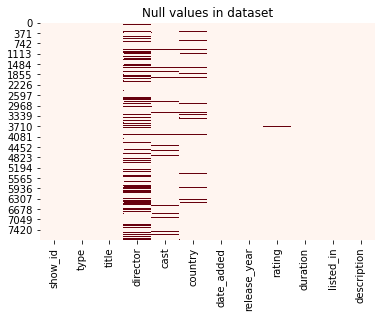

In [8]:
sns.heatmap(netflix_titles.isnull(),cbar=False,cmap='Reds')
plt.title('Null values in dataset')

As you can in the above heatmap, most of the null values are in the column of director.

In [9]:
netflix_titles['director'].fillna('No Director',inplace =True)
netflix_titles['cast'].fillna('No Cast', inplace=True)
netflix_titles['country'].fillna('Country Unavailable', inplace=True)
netflix_titles.dropna(subset=['date_added','rating'],inplace=True)

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so I will drop them from the dataset. 

In [10]:
netflix_titles.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

After, we can see that there are no more null values in the dataset.

## Splitting the Dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can do a good analysis into for Netflix movies or Netflix TV shows or analysing both. So we will create two new datasets. One for movies and the other one for shows.

In [11]:
netflix_movies = netflix_titles[netflix_titles.type == 'Movie'].copy()

In [12]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [13]:
netflix_shows = netflix_titles[netflix_titles.type == 'TV Show'].copy()

In [14]:
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


### Data Preparation
Here, Movies are based on the duration of the movie and shows are based on the number of seasons. Due to this difference, it creates a discrepancy in the duration column. To make EDA easier, We will convert the values in these columns into integers for both the movies and TV Shows datasets.

In [15]:
netflix_movies.duration = netflix_movies['duration'].astype(str).str.replace(' min','').astype(int)
netflix_shows.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows.seasons = netflix_shows.seasons.astype(str).str.replace(' Seasons','').astype(int)


In [16]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


# Exploratory Analysis and Visualization

First we will begin analysis on the entire Netflix dataset consisting of both movies and shows. 

### Netflix Film Types: Movie or TV Show
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

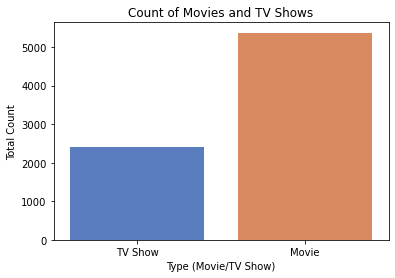

In [17]:
sns.countplot(netflix_titles.type, palette="muted");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

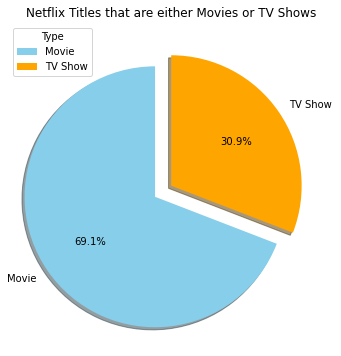

In [18]:
plt.figure(figsize = (12,6))
plt.title("Netflix Titles that are either Movies or TV Shows")
plt.pie(netflix_titles.type.value_counts(),explode = (0.15,0),startangle = 90,shadow=True,autopct='%1.1f%%',labels = netflix_titles.type.value_counts().index,colors = ['skyblue','orange'])
plt.legend(title = 'Type')
plt.show()

In [19]:
print(netflix_movies.shape[0],netflix_shows.shape[0])


5372 2398


So there are roughly 5,000+ movies and almost 2,400 shows with movies being the majority. As shows are always an ongoing thing and have episodes, this thing makes sense. However, in terms of title, there are far more movie titles (69.1%) than TV show titles (30.9%).

## Netflix Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ratings will be based on the age of the respective audience from youngest to oldest. We will exclude the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

In [20]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


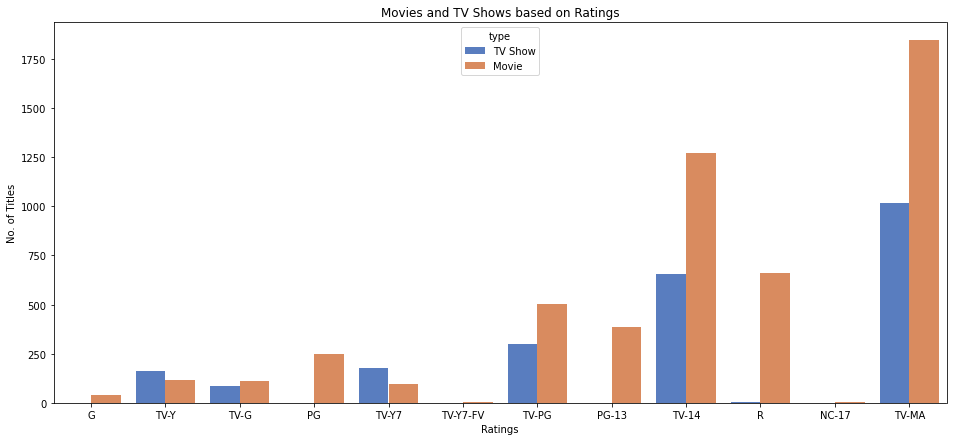

In [21]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,7))
sns.countplot(netflix_titles.rating,hue = netflix_titles.type,order = order,palette = 'muted')
plt.title('Movies and TV Shows based on Ratings')
plt.xlabel('Ratings')
plt.ylabel('No. of Titles')
plt.show()

<ipython-input-22-54f10d265ab8>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


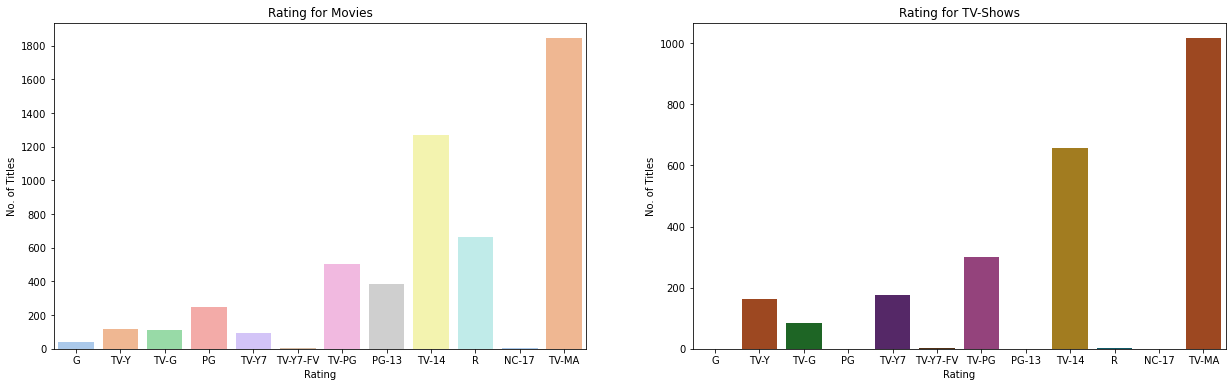

In [22]:
fig,axes = plt.subplots(1,2,figsize=(21,6))
m = sns.countplot(netflix_movies.rating,order=order,palette = 'pastel',ax=axes[0])
m.set_title('Rating for Movies')
m.set_xlabel('Rating')
m.set_ylabel('No. of Titles')
m.set(yticks=np.arange(0,2000,200))
tv = sns.countplot(netflix_shows.rating,order=order,palette = 'dark',ax=axes[1])
tv.set_title('Rating for TV-Shows')
tv.set_xlabel('Rating')
tv.set_ylabel('No. of Titles')
fig.show()

There are nearly 1800 Movies for mature audience, and these are more as compared to TV-Shows.
Overall, there is much more content for a more mature audience. However, for the younger audience (under the age of 16 or 17), it is the opposite, there are slightly more TV shows than there are movies. There are very less R-Rated TV-Shows.

In [26]:
netflix_titles['year_added'] = pd.DatetimeIndex(netflix_titles['date_added']).year
netflix_movies['year_added'] = pd.DatetimeIndex(netflix_movies['date_added']).year
netflix_shows['year_added'] = pd.DatetimeIndex(netflix_shows['date_added']).year
netflix_titles['month_added'] = pd.DatetimeIndex(netflix_titles['date_added']).month
netflix_movies['month_added'] = pd.DatetimeIndex(netflix_movies['date_added']).month
netflix_shows['month_added'] = pd.DatetimeIndex(netflix_shows['date_added']).month
netflix_titles['day_added'] = pd.DatetimeIndex(netflix_titles['date_added']).weekday
netflix_movies['day_added'] = pd.DatetimeIndex(netflix_movies['date_added']).weekday
netflix_shows['day_added'] = pd.DatetimeIndex(netflix_shows['date_added']).weekday

In [27]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,2


In [47]:
netflix_year = netflix_titles['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
netflix_year = netflix_year.sort_values('year')

In [48]:
netflix_year2 = netflix_titles[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'}).sort_values('year')
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'}).sort_values('year')

In [46]:
movie_year

,year,count
13,2008,1
11,2009,2
12,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,58
4,2016,256
3,2017,861


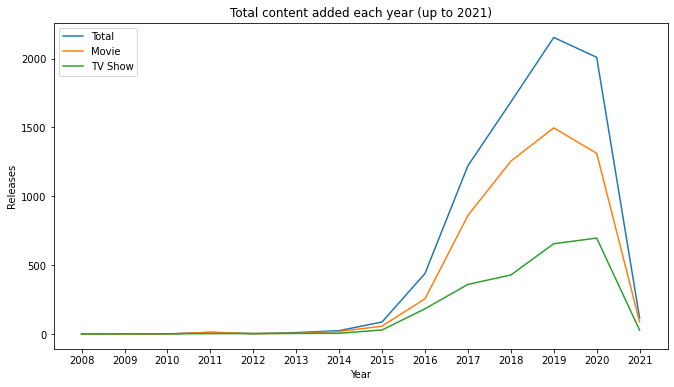

In [49]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added each year (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform started gaining traction from 2015. Since then, the amount of content added has been tremendous. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows. Due to the lockdown across the world, releases decreased in the year 2020.

## Netflix Film Duration

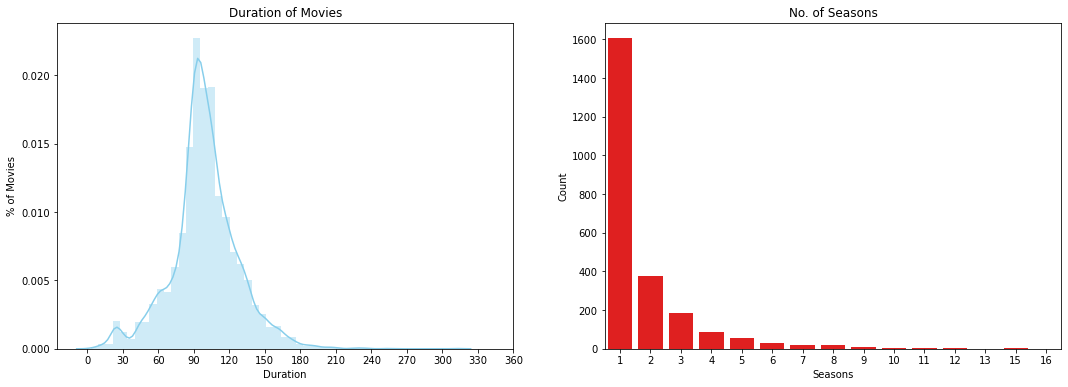

In [64]:
fig,axes = plt.subplots(1,2,figsize=(18,6))
plot = sns.distplot(netflix_movies.duration,color='skyblue',ax=axes[0])
plot.set_xticks(np.arange(0,380,30))
plot.set_title('Duration of Movies')
plot.set_xlabel('Duration')
plot.set_ylabel('% of Movies')
plot2 = sns.countplot(netflix_shows.seasons,color = 'red',ax = axes[1])
plot2.set_xlabel('Seasons')
plot2.set_ylabel('Count')
plot2.set_title('No. of Seasons')
plt.show()

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. On the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

## Popular Genres

In [75]:
filtered_genres = netflix_titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [79]:
filtered_genres.value_counts().index

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries', 'Action & Adventure', 'TV Dramas',
       'Independent Movies', 'Children & Family Movies', 'Romantic Movies',
       'TV Comedies', 'Thrillers', 'Crime TV Shows', 'Kids' TV', 'Docuseries',
       'Romantic TV Shows', 'Stand-Up Comedy', 'Music & Musicals',
       'Horror Movies', 'British TV Shows', 'Reality TV', 'Sci-Fi & Fantasy',
       'Sports Movies', 'Korean TV Shows', 'TV Action & Adventure',
       'Spanish-Language TV Shows', 'Anime Series', 'Classic Movies',
       'TV Mysteries', 'LGBTQ Movies', 'Science & Nature TV',
       'TV Sci-Fi & Fantasy', 'TV Horror', 'Teen TV Shows', 'Cult Movies',
       'Faith & Spirituality', 'Anime Features',
       'Stand-Up Comedy & Talk Shows', 'Movies', 'TV Thrillers',
       'Classic & Cult TV', 'TV Shows'],
      dtype='object')

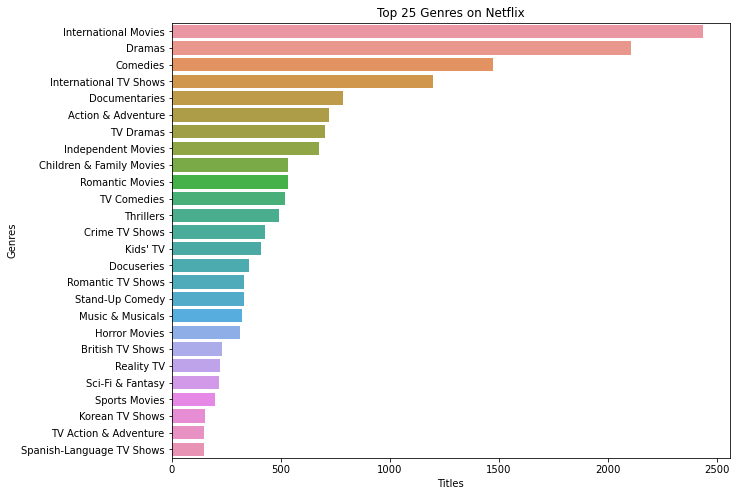

In [81]:
plt.figure(figsize=(10,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:26])
plt.title('Top 25 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, international movies tops the genre chart surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies and TV Shows. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

In [89]:
filtered_countries = netflix_titles.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

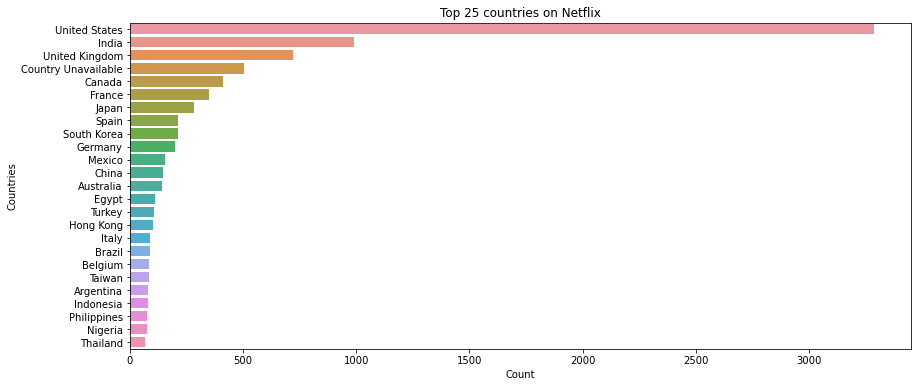

In [94]:
plt.figure(figsize=(14,6))
plot3 = sns.countplot(y = filtered_countries,order = filtered_countries.value_counts().index[:25])
plot3.set_title('Top 25 countries on Netflix')
plot3.set_xlabel('Count')
plot3.set_ylabel('Countries')
plt.show()

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 25 list to see which countries have the highest availability of films on Netflix. The United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

In [95]:
jovian.commit(project='analysing netflix movies and tv shows')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Creating a new project "shreyasnax2451/analysing netflix movies and tv shows"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/shreyasnax2451/analysing-netflix-movies-and-tv-shows


'https://jovian.ai/shreyasnax2451/analysing-netflix-movies-and-tv-shows'

## Answering Questions

1. How many titles released in the year 2021 ?

In [109]:
netflix_titles[netflix_titles.year_added == 2021].shape[0]

117

2. How many titles released from India ?

In [117]:
netflix_titles[netflix_titles.country == 'India']['title'].count()

923

3. Who are the top 10 actors on Netflix based on number of titles?

In [135]:
filtered_cast = netflix_titles[netflix_titles.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


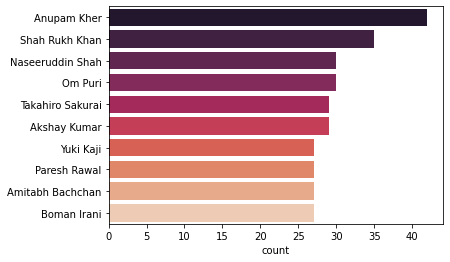

In [137]:
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

4. In which year, Netflix added more International Movies ? 

In [153]:
international_movies = netflix_titles[netflix_titles['listed_in'].str.contains('International Movies')]
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T


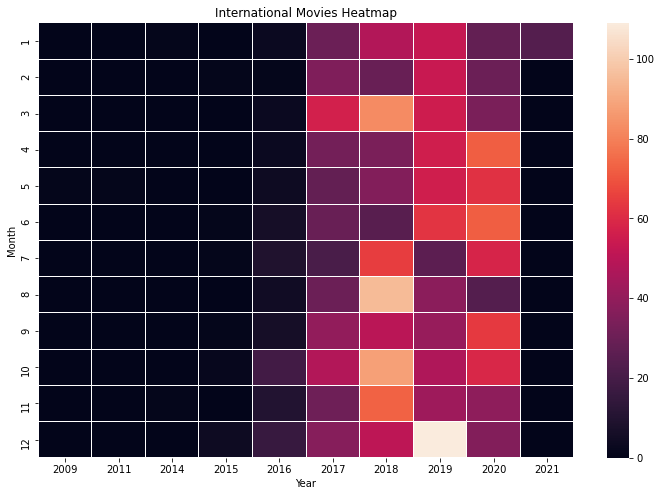

In [156]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025)
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the heatmap above, we can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content.

5. In which year, highest International TV Shows were added in Netflix ?

In [180]:
international_shows = netflix_titles[netflix_titles.listed_in.str.contains('International TV Shows?')]
int_tv_shows_year = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

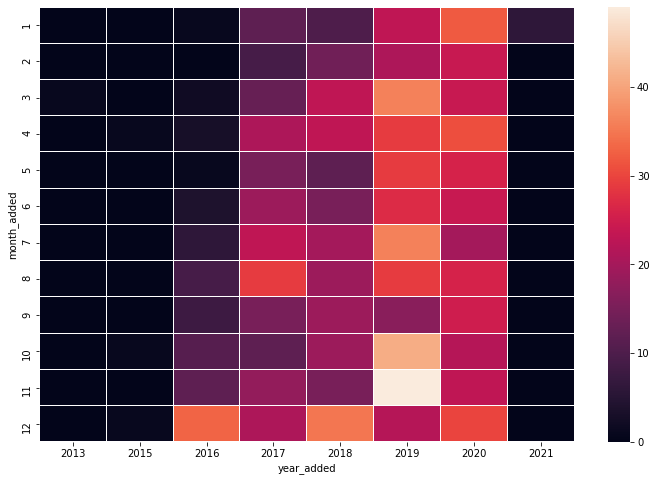

In [186]:
plt.figure(figsize=(12, 8))
sns.heatmap(int_tv_shows_year,linewidths = 0.03)
plt.show()

In the above heatmap, we can see that the majority of international TV shows were added throughout the year 2019.

# Inferences and Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

## References:
https://www.kaggle.com/shivamb/netflix-shows

In [188]:
jovian.commit(project='analysing netflix movies and tv shows')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shreyasnax2451/analysing-netflix-movies-and-tv-shows" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/shreyasnax2451/analysing-netflix-movies-and-tv-shows


'https://jovian.ai/shreyasnax2451/analysing-netflix-movies-and-tv-shows'

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
